### Importing packages

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [226]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Reading The Data

In [322]:
df1 = pd.read_excel('Credit Card Data.xlsx','Customer Details')
df2 = pd.read_excel('Credit Card Data.xlsx','Spend')
df3 = pd.read_excel('Credit Card Data.xlsx','Repayment')

In [323]:
df1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,47,BANGALORE,Gold,1500000,C1,Self Employed
1,2,A2,56,CALCUTTA,Silver,300000,C2,Salaried_MNC
2,3,A3,30,COCHIN,Platimum,540000,C3,Salaried_Pvt
3,4,A4,22,BOMBAY,Platimum,840084,C4,Govt
4,5,A5,59,BANGALORE,Platimum,420084,C5,Normal Salary


In [277]:
df2.drop('Unnamed: 5', axis=1,inplace=True) # was getting unnamed column, so dropping it.

In [278]:
df2.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,935.495203
2,3,A1,2004-01-15,CLOTHES,8687.895474
3,4,A1,2004-01-25,FOOD,341.159711
4,5,A1,2005-01-17,CAMERA,3406.639477


In [279]:
df3.head()

,SL No:,Customer,Month,Amount
0,1,A1,2006-05-15,2.308473e+05
1,2,A1,2005-08-27,1.835124e+03
2,3,A1,2004-03-07,4.858701e+03
3,4,A1,2005-03-01,1.360527e+06
4,5,A1,2004-02-14,1.902322e+05


In [280]:
df3.Amount = df3.Amount.round(decimals=2)

In [281]:
df3.head()

,SL No:,Customer,Month,Amount
0,1,A1,2006-05-15,230847.25
1,2,A1,2005-08-27,1835.12
2,3,A1,2004-03-07,4858.70
3,4,A1,2005-03-01,1360526.91
4,5,A1,2004-02-14,190232.22


### 1) Checking the data for any corrupt data, missing values, incorrect data types etc.

In [231]:
df1.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [204]:
df1.isnull().sum() # Checking if any null value

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [251]:
df2.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [252]:
df3.isna().sum()# Repayment data is having $ null values in Amount column

SL No:      0
Customer    0
Month       4
Amount      0
dtype: int64

### 2) Makeing the following substitution:
a. Age of credit card customer can't be less than 18. In case age is less than 18, replaceing
it with mean of age.

In [325]:
df1[df1['Age']<18]# checkin how many customers are below 18

,No,Customer,Age,City,Product,Limit,Company,Segment
46,47,A47,16,CHENNAI,Platimum,1380000,C9,Normal Salary
69,70,A70,16,BOMBAY,Platimum,420000,C32,Self Employed
93,94,A94,14,COCHIN,Gold,500000,C17,Govt


In [326]:
avg = df1.Age.mean()
df1.Age = df1.Age.apply(lambda v: avg if v<18 else v)

In [327]:
df1.tail()

,No,Customer,Age,City,Product,Limit,Company,Segment
95,96,A96,54.0,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,75.0,TRIVANDRUM,Platimum,30000,C20,Govt
97,98,A98,29.0,CALCUTTA,Platimum,30000,C21,Normal Salary
98,99,A99,59.0,CALCUTTA,Platimum,120000,C22,Self Employed
99,100,A100,55.0,COCHIN,Silver,100000,C5,Salaried_MNC


In [328]:
df1[df1['Age']<18] # all the below 18 age got replaced by mean

,No,Customer,Age,City,Product,Limit,Company,Segment


### 3) Answer the following Questions:
a. How many unique customers are there?

In [209]:
df1['Customer'].nunique() #checking number of unique customers

100

#### b. How many spend categories are there?

In [381]:
df2['Type'].value_counts().count() #According to 15 spend categories are there.

15

#### c. Which category has the highest average spend?

In [343]:
df2.groupby('Type').Amount.mean()# Air ticket is having highest average spend

Type
AIR TICKET      254632.194082
AUTO             27320.763977
BIKE            210701.269489
BUS TICKET       12681.030717
CAMERA           21499.802175
CAR             409143.467018
CLOTHES          25140.160688
FOOD               341.168321
JEWELLERY       239218.687225
MOVIE TICKET      1875.298919
PETRO              549.483953
RENTAL           13106.511138
SANDALS           2516.628761
SHOPPING          7394.332039
TRAIN TICKET      1627.490364
Name: Amount, dtype: float64

#### d. What is the average monthly spent by product categories?

In [358]:
df2['only_months'] = pd.to_datetime(df2['Month']).dt.month
df2['only_year'] = pd.to_datetime(df2['Month']).dt.year

In [360]:
df2.groupby(['Type','only_year','only_months']).Amount.mean().head()#Monthly spent by category

Type        only_year  only_months
AIR TICKET  2004       1              257735.676815
                       2              214071.843860
                       3              455343.363643
                       11             209883.255903
            2005       1              303015.607706
Name: Amount, dtype: float64

#### e. Which customers are reaching 90% or more of their spending limit?

In [370]:
c = df1.merge(df2, on='Customer', how= 'inner' )
c.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Unnamed: 5,only_months,only_year
0,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,NaN,1,2004
1,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,2,2004-01-03,PETRO,935.495203,NaN,1,2004
2,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,3,2004-01-15,CLOTHES,8687.895474,NaN,1,2004
3,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,4,2004-01-25,FOOD,341.159711,NaN,1,2004
4,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,NaN,1,2005


In [371]:
c['percent'] = 100 * c ['Amount']/df1['Limit']
c.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Unnamed: 5,only_months,only_year,percent
0,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,NaN,1,2004,22.936999
1,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,2,2004-01-03,PETRO,935.495203,NaN,1,2004,0.311832
2,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,3,2004-01-15,CLOTHES,8687.895474,NaN,1,2004,1.608870
3,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,4,2004-01-25,FOOD,341.159711,NaN,1,2004,0.040610
4,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,NaN,1,2005,0.810942


In [372]:
#c.loc[(c['percent'] >90)]
len(c.loc[(c['percent']>90)])# there are 5 customers who are reaching beyond 90% of their spending limit.

5

#### f. Which city has the maximum number of spenders, each month? Is there a need to run campaigns in specific cities?

In [373]:
c['Amount']=c['Amount'].round()

In [369]:
c.groupby(['City','only_year','only_months']).Amount.max().head(10)

City       only_year  only_months
BANGALORE  2004       1               468900.0
                      2               228947.0
                      3                17664.0
                      4               131352.0
                      5                 4797.0
                      9                 2805.0
                      11              459281.0
           2005       1                22892.0
                      2              1307745.0
                      4                 7532.0
Name: Amount, dtype: float64

In [380]:
city_spender_max=c.groupby('Amount').City.max()
city_spender_max.head(10)

Amount
3.0         DELHI
6.0     BANGALORE
14.0       COCHIN
19.0     CALCUTTA
22.0        DELHI
24.0        PATNA
35.0     CALCUTTA
38.0       COCHIN
44.0    BANGALORE
51.0     CALCUTTA
Name: City, dtype: object

In [378]:
c.groupby(['City']).Amount.sum().head(50)#In Triruvandrum there is a need to run campaign.

City
BANGALORE     15944285.0
BOMBAY        13392259.0
CALCUTTA      14324072.0
CHENNAI       11405900.0
COCHIN        21119133.0
DELHI          6156189.0
PATNA          5728965.0
TRIVANDRUM     5285059.0
Name: Amount, dtype: float64

#### g. Which age group spends the most?

In [382]:
c.groupby('Age').Amount.max().sort_values(ascending=False)# 47 age group people are spending most.

Age
47.00    1307745.0
71.00     950543.0
46.46     655393.0
39.00     616518.0
68.00     497828.0
51.00     493939.0
41.00     493797.0
74.00     490613.0
18.00     488619.0
26.00     486155.0
30.00     485874.0
59.00     485322.0
58.00     479180.0
27.00     479116.0
22.00     477199.0
24.00     475407.0
38.00     473696.0
69.00     468900.0
64.00     466368.0
63.00     465644.0
54.00     464635.0
23.00     463952.0
67.00     455343.0
65.00     452497.0
48.00     449521.0
50.00     445834.0
36.00     431831.0
57.00     431150.0
62.00     416018.0
29.00     408699.0
55.00     394372.0
44.00     377085.0
35.00     376230.0
60.00     351310.0
33.00     329991.0
73.00     329821.0
72.00     302161.0
46.00     292925.0
42.00     207419.0
25.00     184763.0
43.00     171945.0
40.00     153638.0
56.00     141773.0
21.00      41832.0
28.00      35490.0
19.00      31284.0
75.00      13440.0
37.00       4755.0
31.00       4195.0
Name: Amount, dtype: float64

In [383]:
df_wifi = pd.read_excel('Wifi_Data.xlsx')

In [388]:
df_wifi.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,998,MN,Free,LinkNYC - Citybridge,40.745968,-73.994039,Outdoor Kiosk,New York,1,MN17
1,999,MN,Free,LinkNYC - Citybridge,40.744614,-73.985069,Outdoor Kiosk,New York,1,MN17
2,1000,MN,Free,LinkNYC - Citybridge,40.757666,-73.985878,Outdoor Kiosk,New York,1,MN17
3,1001,MN,Free,LinkNYC - Citybridge,40.759971,-73.984342,Outdoor Kiosk,New York,1,MN17
4,1002,MN,Free,LinkNYC - Citybridge,40.760413,-73.984541,Outdoor Kiosk,New York,1,MN17


### 1) Get the data provided, check frequency distribution of the features, drop irrelevant and redundant features if any and state your inferences?

<AxesSubplot:>

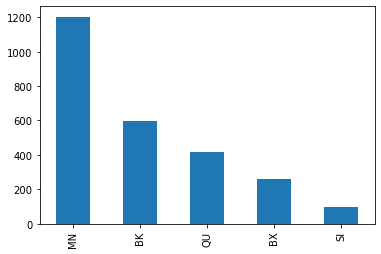

In [395]:
df_wifi.Borough.value_counts().plot.bar()

<AxesSubplot:>

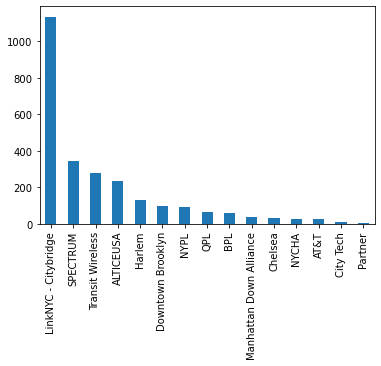

In [396]:
df_wifi.Provider.value_counts().plot.bar()

<AxesSubplot:>

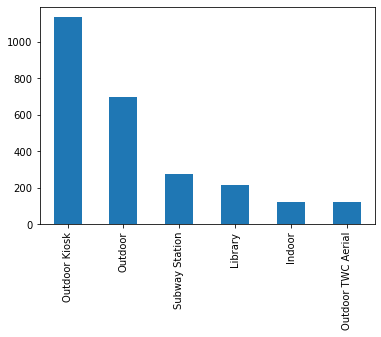

In [397]:
df_wifi.Location_T.value_counts().plot.bar()

<AxesSubplot:>

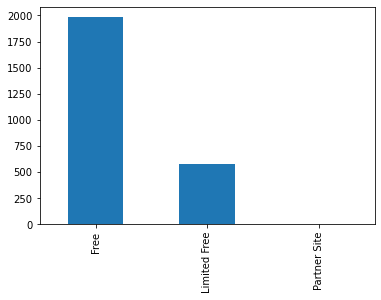

In [400]:
df_wifi.Type.value_counts().plot.bar()

<AxesSubplot:ylabel='NTACode'>

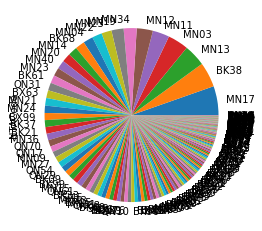

In [402]:
df_wifi.NTACode.value_counts().plot.pie()

<AxesSubplot:ylabel='BoroCode'>

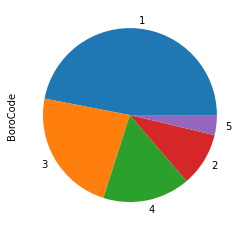

In [403]:
df_wifi.BoroCode.value_counts().plot.pie()

In [405]:
df_wifi.City.value_counts()

New York            1204
Brooklyn             595
Queens               350
Bronx                257
Staten Island         95
Flushing               9
Long Island City       8
Jamaica                5
Corona                 3
Bayside                3
Richmond Hill          2
Forest Hills           2
Little Neck            2
East Elmhurst          1
Glen Oaks              1
Glendale               1
College Point          1
Cambria Heights        1
Howard Beach           1
Rockaway Park          1
Queens Village         1
Ozone Park             1
Middle Village         1
Fresh Meadows          1
South Hollis           1
Far Rockaway           1
Rosedale               1
Woodside               1
Jackson Heights        1
Saint Albans           1
South Ozone Park       1
Bellerose              1
Rockaway Beach         1
Broad Channel          1
Whitestone             1
Ridgewood              1
Arverne                1
Rego Park              1
Laurelton              1
Hollis                 1


In [385]:
df_wifi.describe()

,OBJECTID,Latitude,Longitude,BoroCode
count,2566.000000,2566.000000,2566.000000,2566.000000
mean,1283.500000,40.738396,-73.947564,2.196804
std,740.884719,0.070845,0.067150,1.282300
min,1.000000,40.509531,-74.244107,1.000000
25%,642.250000,40.693069,-73.985954,1.000000
50%,1283.500000,40.743196,-73.958354,2.000000
75%,1924.750000,40.796066,-73.922968,3.000000
max,2566.000000,40.903723,-73.714838,5.000000


In [386]:
df_wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2566 non-null   int64  
 1   Borough     2566 non-null   object 
 2   Type        2566 non-null   object 
 3   Provider    2566 non-null   object 
 4   Latitude    2566 non-null   float64
 5   Longitude   2566 non-null   float64
 6   Location_T  2566 non-null   object 
 7   City        2566 non-null   object 
 8   BoroCode    2566 non-null   int64  
 9   NTACode     2566 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 200.6+ KB


### 2) Using appropriate data visualization answer the following:
a. Plot the providers vs number of all wi-fi hotspots they have in operation? Who has
the highest installations?

In [408]:
df_wifi.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,998,MN,Free,LinkNYC - Citybridge,40.745968,-73.994039,Outdoor Kiosk,New York,1,MN17
1,999,MN,Free,LinkNYC - Citybridge,40.744614,-73.985069,Outdoor Kiosk,New York,1,MN17
2,1000,MN,Free,LinkNYC - Citybridge,40.757666,-73.985878,Outdoor Kiosk,New York,1,MN17
3,1001,MN,Free,LinkNYC - Citybridge,40.759971,-73.984342,Outdoor Kiosk,New York,1,MN17
4,1002,MN,Free,LinkNYC - Citybridge,40.760413,-73.984541,Outdoor Kiosk,New York,1,MN17


<AxesSubplot:xlabel='Provider', ylabel='OBJECTID'>

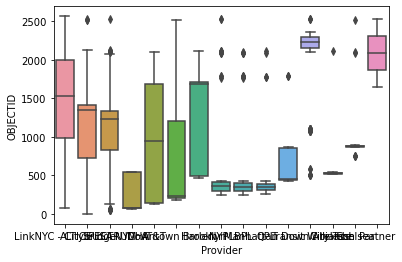

In [422]:
sns.boxplot(x = 'Provider', y = 'OBJECTID', data = df_wifi)

### b. Plot providers vs number of free wifi hotspots.

In [431]:
df_wifi['free_wifi']= (df_wifi['Type']=='Free')

In [446]:
CrosstabResult=pd.crosstab(index=df_wifi['Provider'],columns=df_wifi['free_wifi'])
print(CrosstabResult)


free_wifi                False  True 
Provider                             
ALTICEUSA                  237      0
AT&T                         1     26
BPL                          0     59
Chelsea                      0     30
City Tech                    0     11
Downtown Brooklyn            0    100
Harlem                       0    128
LinkNYC - Citybridge         0   1134
Manhattan Down Alliance      0     36
NYCHA                        0     28
NYPL                         0     90
Partner                      2      0
QPL                          0     65
SPECTRUM                   343      0
Transit Wireless             0    276


<AxesSubplot:xlabel='Provider'>

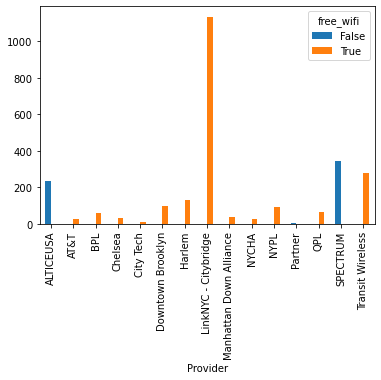

In [447]:
%matplotlib inline 
CrosstabResult.plot.bar()# Plotting providers vs number of free wifi hotspots

#### c. Are there any provider(s) who do not provide free wifi?

<AxesSubplot:xlabel='Type'>

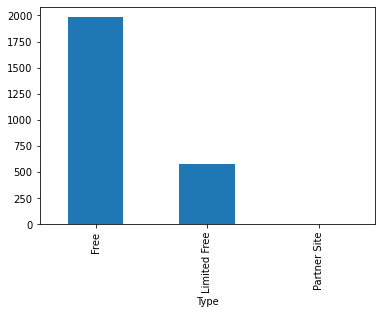

In [451]:
df_wifi.groupby('Type').Provider.count().plot.bar() # there are providers who do not provide free wifi

### d. Which Location type (Location_T) are most common and least common?

<AxesSubplot:>

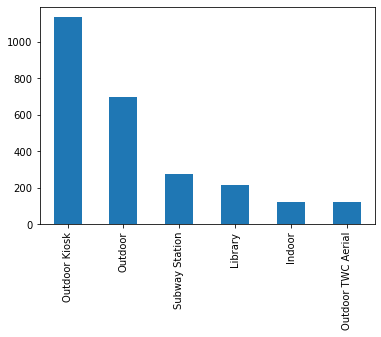

In [452]:
df_wifi.Location_T.value_counts().plot.bar()# outdoor Kiosk are most common location

### e. How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.

In [453]:
df_wifi.Location_T.value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

In [474]:
df_wifi['Outdoor_Location_T']= (df_wifi['Location_T']=='Outdoor')
df_wifi.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode,free_wifi,Outdoor_Location_T
0,998,MN,Free,LinkNYC - Citybridge,40.745968,-73.994039,Outdoor Kiosk,New York,1,MN17,True,False
1,999,MN,Free,LinkNYC - Citybridge,40.744614,-73.985069,Outdoor Kiosk,New York,1,MN17,True,False
2,1000,MN,Free,LinkNYC - Citybridge,40.757666,-73.985878,Outdoor Kiosk,New York,1,MN17,True,False
3,1001,MN,Free,LinkNYC - Citybridge,40.759971,-73.984342,Outdoor Kiosk,New York,1,MN17,True,False
4,1002,MN,Free,LinkNYC - Citybridge,40.760413,-73.984541,Outdoor Kiosk,New York,1,MN17,True,False


<AxesSubplot:xlabel='Provider,free_wifi'>

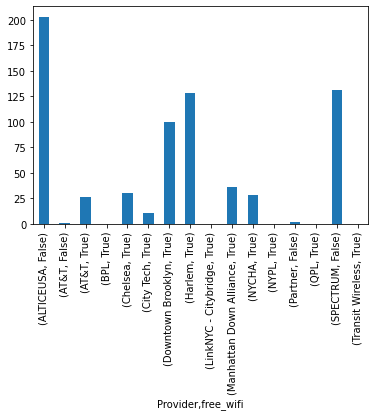

In [483]:
df_wifi.groupby(['Provider','free_wifi']).Outdoor_Location_T.sum().plot.bar()
# Harlem is highest free outdoor wifi provider